## Import Libs & Data

In [35]:
# First try in Kaggle to check the submission
# My first starter used for myself
# He HAO, Instituto Superior Técnico (https://github.com/HAOHE123)

# Essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn

# Situational Libraries
import matplotlib.patches as patches  # For adding shapes to plots
from matplotlib import animation, rc  # For creating animations
import os  # For interacting with the operating system
import time  # For time-related functions
import glob  # For file pattern matching
import json  # For handling JSON data
import collections  # For specialized container datatypes

In [36]:
# Check all files
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [37]:
# Read the Data
train_path = '/kaggle/input/titanic/'

train = pd.read_csv(train_path + 'train.csv')
test = pd.read_csv(train_path + 'test.csv')
gender_sub = pd.read_csv(train_path + 'gender_submission.csv')

In [38]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [41]:
gender_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Data Analyze

In [42]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [43]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [44]:
# Age cannot be sorted directly
# Define age bins
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

# Create a new column with age groups
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels)

# Group by the new AgeGroup column

age_grouped = train[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index=False, observed=True).mean().sort_values(by='Survived', ascending=False)
print(age_grouped)

      AgeGroup  Survived
0        Child  0.579710
1         Teen  0.428571
3        Adult  0.400000
2  Young Adult  0.382682
4       Senior  0.227273


In [45]:
# The close relationship members
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [46]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Data Visualization

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

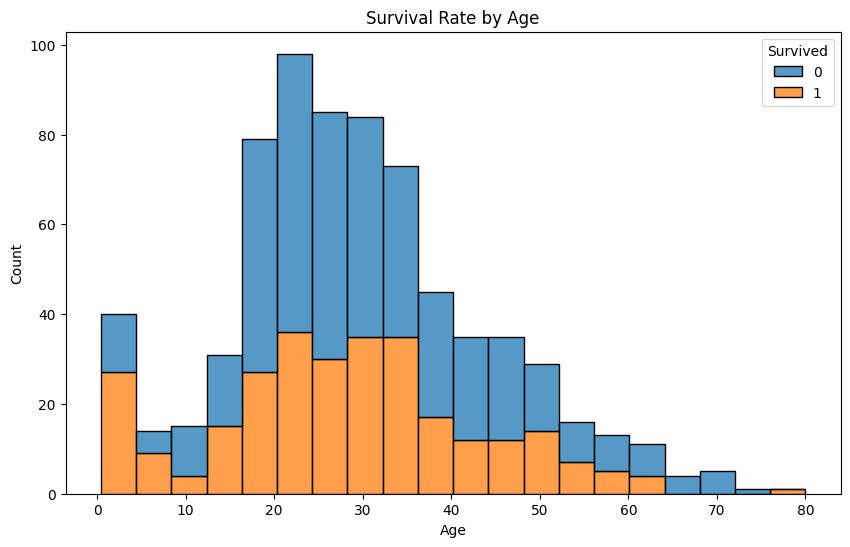

In [47]:
# The survivial rate decrease rapidly when age is higher than 60, while increase a lot when age lower than 10 
# Create a plot to visualize survival rate by age
plt.figure(figsize=(10, 6))

sns.histplot(data=train, x='Age', hue='Survived', multiple='stack', bins=20, kde=False)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [55]:
# Other data is easily differentiable
# Use Chatgpt to generate part of the following figures codes

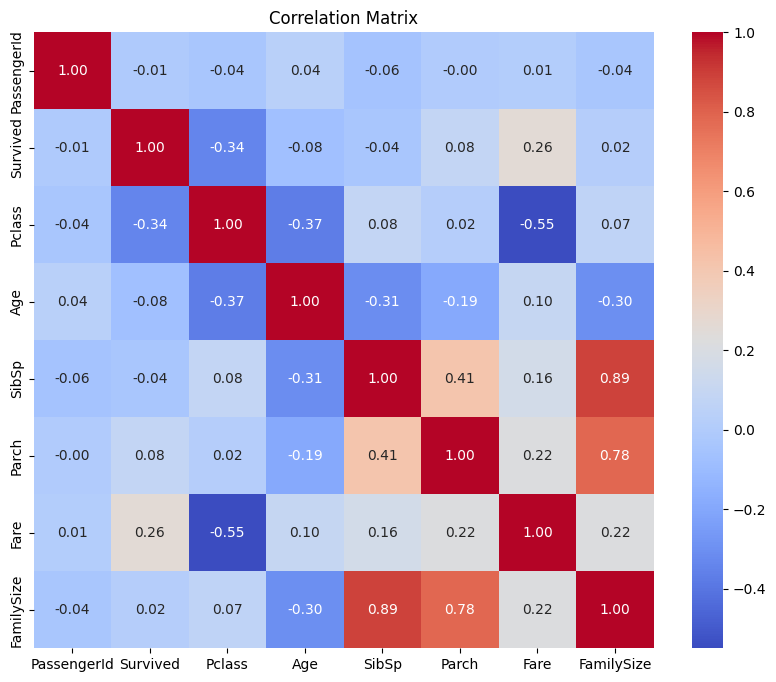

In [60]:
# A heatmap is a good idea, while there are values not numberical
# Select only numeric columns for the correlation matrix
numeric_columns = train.select_dtypes(include=[np.number])

# Create a heatmap of the correlation matrix
# The heatmap reflects the correlation of each feature to survival
# We can futher use this result to predict the missing data
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

   FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.303538
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000


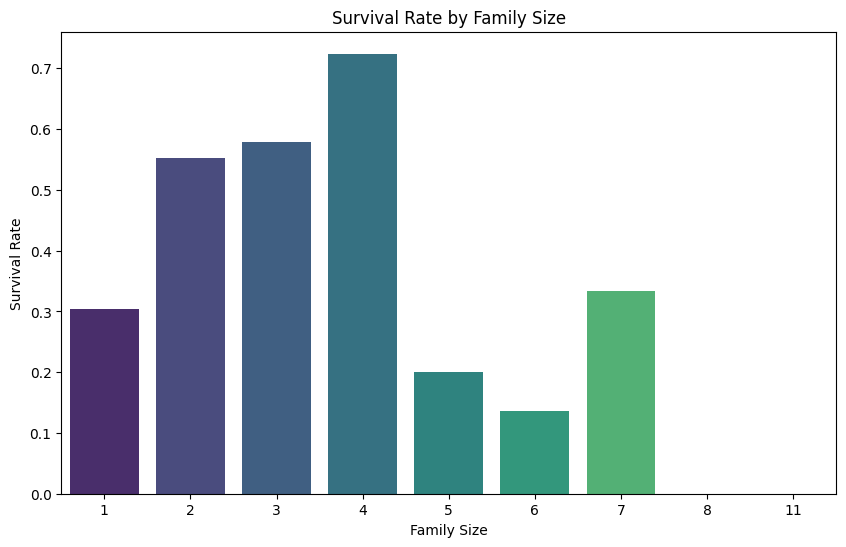

In [61]:
# Remaining Features are obvious and easy to konw the correlation to the survival result
# So I use Chatgpt to generate the remaining visulizatoin directly
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
family_survival = train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(family_survival)

plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=family_survival, palette='viridis')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

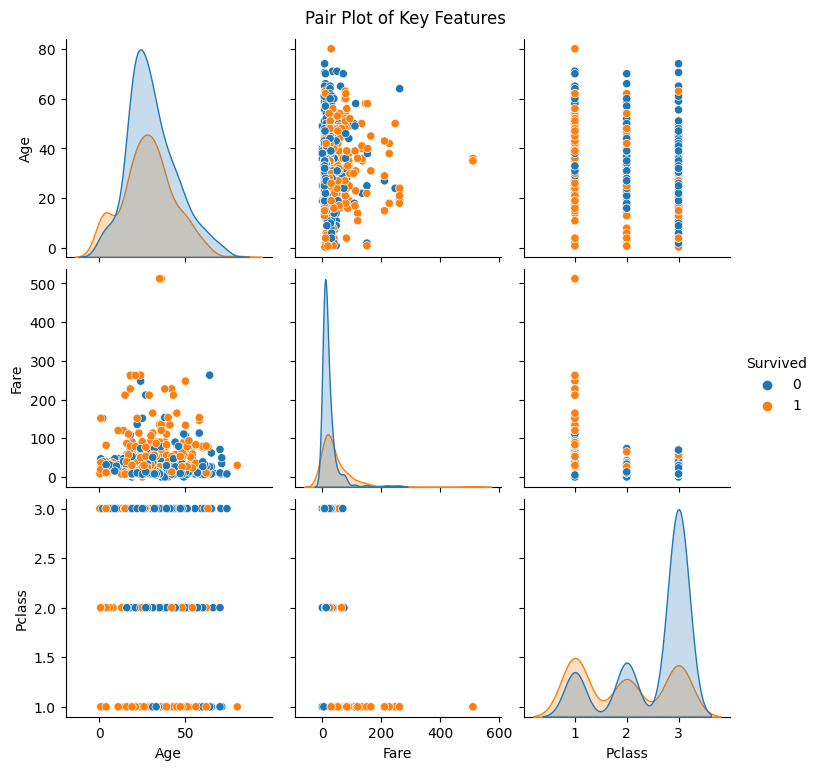

In [51]:
sns.pairplot(train[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', diag_kind='kde')
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

/tmp/ipykernel_37/3124209887.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_grouped = train[['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean().sort_values(by='Survived', ascending=False)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


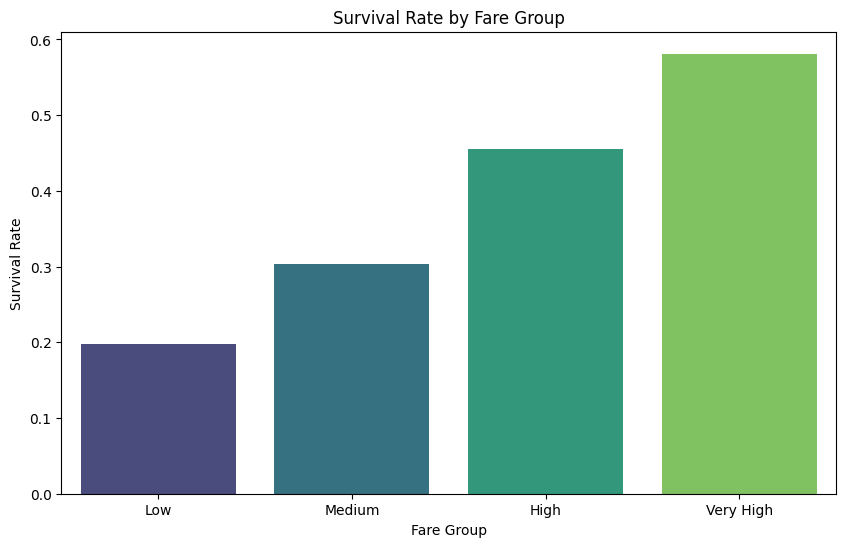

In [52]:
train['FareGroup'] = pd.qcut(train['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
fare_grouped = train[['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean().sort_values(by='Survived', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='FareGroup', y='Survived', data=fare_grouped, palette='viridis')
plt.title('Survival Rate by Fare Group')
plt.xlabel('Fare Group')
plt.ylabel('Survival Rate')
plt.show()

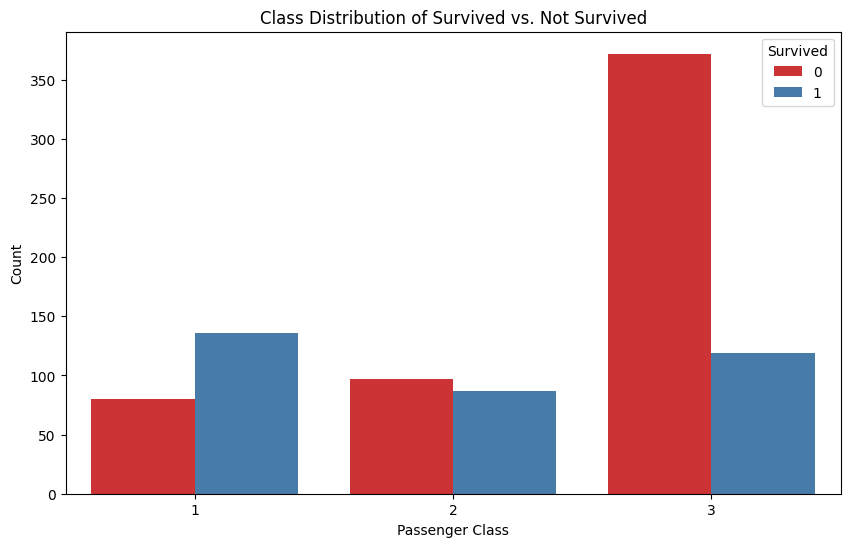

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=train, palette='Set1')
plt.title('Class Distribution of Survived vs. Not Survived')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

<Figure size 1000x600 with 0 Axes>

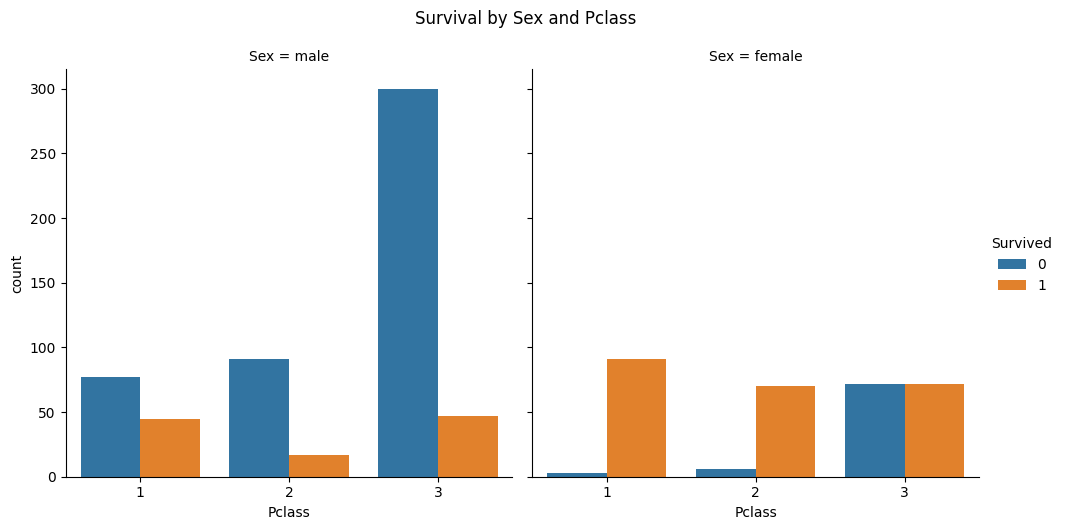

In [54]:
plt.figure(figsize=(10, 6))
sns.catplot(x='Pclass', hue='Survived', col='Sex', kind='count', data=train, height=5, aspect=1)
plt.suptitle('Survival by Sex and Pclass', y=1.05)
plt.show()

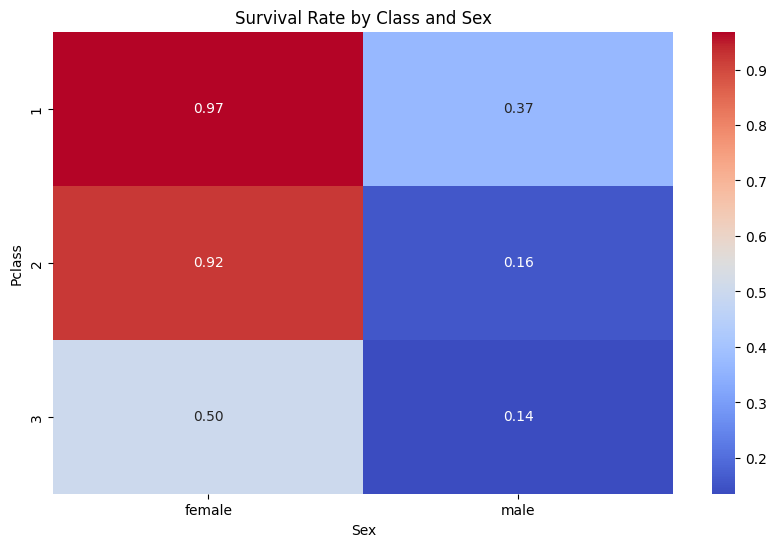

In [56]:
plt.figure(figsize=(10, 6))
survival_crosstab = pd.crosstab(train['Pclass'], train['Sex'], values=train['Survived'], aggfunc='mean')
sns.heatmap(survival_crosstab, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Survival Rate by Class and Sex')
plt.show()

## Data Pre-Processing

In [59]:
# In this problem, there are many values missing (NaN)
# Usually the best way is first to predict the missing data according to the known part
# Also, we need to lower the dimension for easier prediction of the final result (The PCA of course)

In [65]:
# Let us fill the unknown data
# Count missing values in each column

# .sum is the function called to count the number of isnull (How many Positive)
missing_values_train = train.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values_train > 0])

Age         177
Cabin       687
Embarked      2
AgeGroup    177
dtype: int64


In [66]:
# Also the test data
missing_values_test = train.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values_test > 0])

Age       86
Fare       1
Cabin    327
dtype: int64


## Build Model to Predict the Missing Data

In [68]:
# Let us start with an easy one such that we do not need the futher tune of the parameters
from sklearn.ensemble import RandomForestRegressor

# Select the features for imputation
age_features = ['Pclass', 'SibSp', 'Parch', 'Fare']
age_train = train[train['Age'].notnull()][age_features]
age_target = train[train['Age'].notnull()]['Age']

# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(age_train, age_target)

# Predict missing Age values
age_missing = train[train['Age'].isnull()][age_features]
train.loc[train['Age'].isnull(), 'Age'] = rf.predict(age_missing)

ValueError: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by RandomForestRegressor.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

In [ ]:
# The